# Generate Data


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


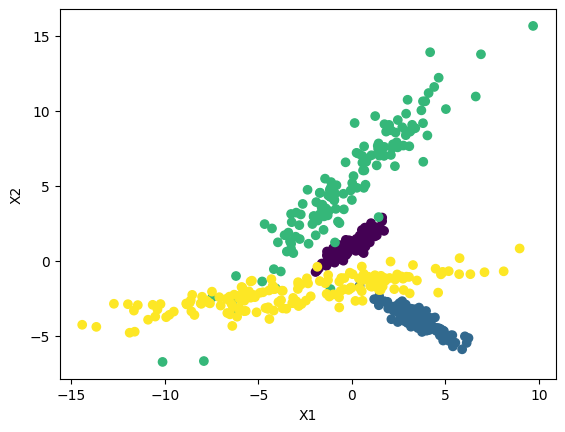

In [49]:
!pip install numpy scikit-learn repliclust

import numpy as np
import repliclust as rpl
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib as plt

rpl.set_seed(123)

OPENAI_KEY = "your-openai-api-key"

DATA_DESCRIPTION = "four very oblong clusters of different shapes and distributions"

X, y_true, archetype = rpl.generate(DATA_DESCRIPTION, openai_api_key=OPENAI_KEY)

# plot the true clusters
rpl.plot(X, y_true)

# Apply Different Clustering Algorithms

### K-Means

K-Means carries an inductive bias towards spherical clusters and does not correctly recognize oblong ones.

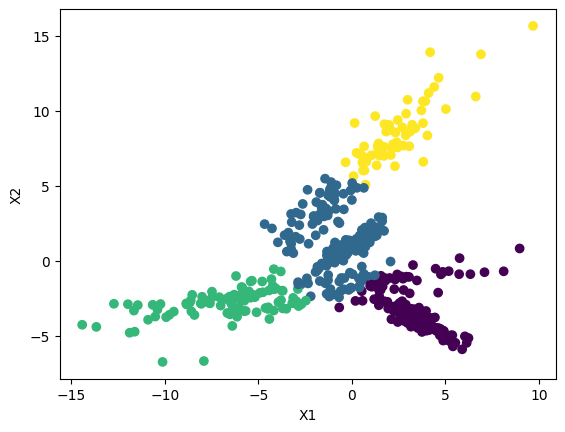

In [50]:
y_kmeans = KMeans(n_clusters = archetype.n_clusters, n_init='auto').fit_predict(X)
rpl.plot(X, y_kmeans)

### Hierarchical Clustering

Greedily merging the closest data points risks missing the "big picture" at the expense of joining data points at the periphery.

Using the Ward linkage (linkage="ward") does a much better job.

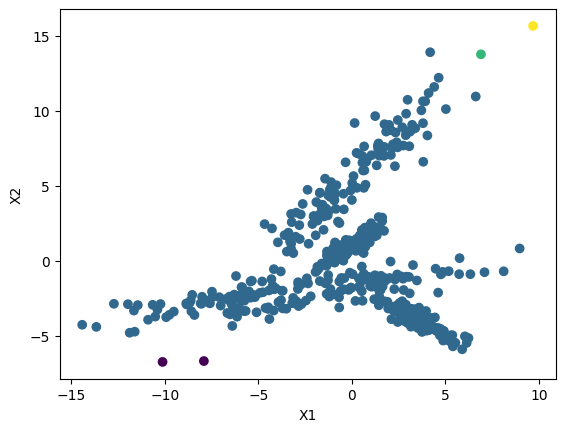

In [51]:
y_hierarchical = AgglomerativeClustering(n_clusters = archetype.n_clusters, linkage='single').fit_predict(X)
rpl.plot(X, y_hierarchical)

### DBSCAN

DBSCAN is based on recognizing groups of data points with high density. You must set the neighborhood radius ("eps") and the minimum number of neighboring samples a data point must have to be considered as part of a dense region ("min_samples"). The algorithm is sensitive to these parameters. On the plus side, DBSCAN does not require knowing the number of clusters. It will mark data points not assigned to dense regions as noise points (with label y=-1).

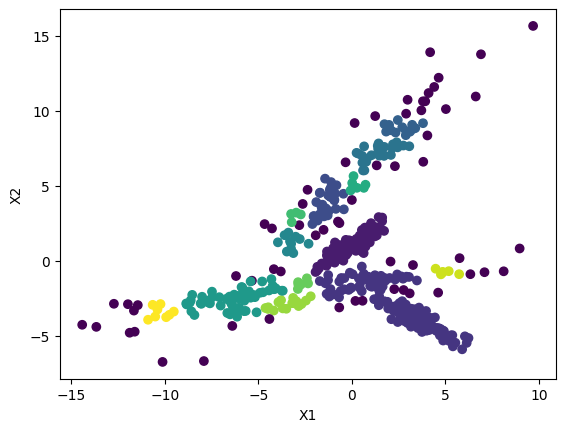

In [52]:
y_dbscan = DBSCAN(eps=0.6, min_samples=4).fit_predict(X)
rpl.plot(X, y_dbscan)

In [54]:
print("Fraction of data points considered 'noise' by DBSCAN: {}".format(np.mean(y_dbscan == -1)))

Fraction of data points considered 'noise' by DBSCAN: 0.12


### Gaussian Mixture Model

A Gaussian mixture model perfectly recognizes the oblong shape of the clusters. However, it is sensitive to the number of data points. The algorithm does not work well if there are too few data points, because modeling each cluster's covariance matrix is unreliable with too few samples.

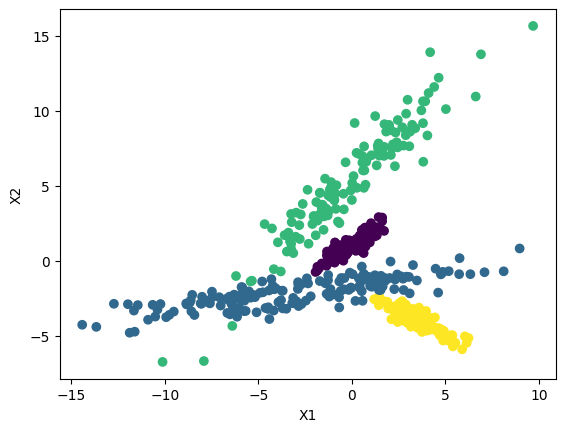

In [64]:
y_gmm = GaussianMixture(n_components=archetype.n_clusters).fit_predict(X)
rpl.plot(X, y_gmm)

The Gaussian mixture fails if we reduce the number of samples:

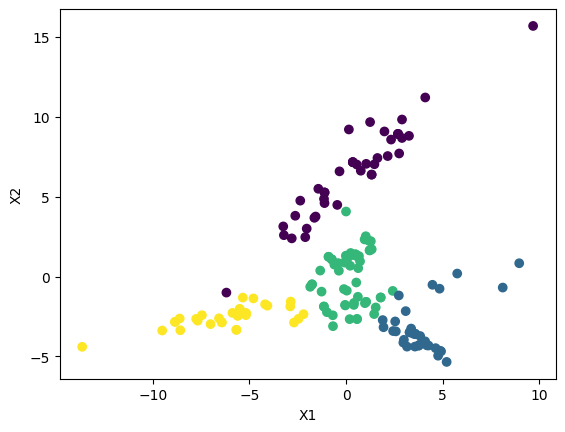

In [77]:
# subsample data to simulate few samples
np.random.seed(1)
idx = [ int(x) for x in np.random.choice(X.shape[0], int(X.shape[0]/3)) ]
X_subsampled = X[idx,:]
y_subsampled = y_true[idx]
y_subsampled_gmm = GaussianMixture(n_components=archetype.n_clusters).fit_predict(X_subsampled)
rpl.plot(X_subsampled, y_subsampled_gmm)

# Explore More

Try running this same notebook for different types of data, by changing the DATA_DESCRIPTION in the first cell!

Here's an example:

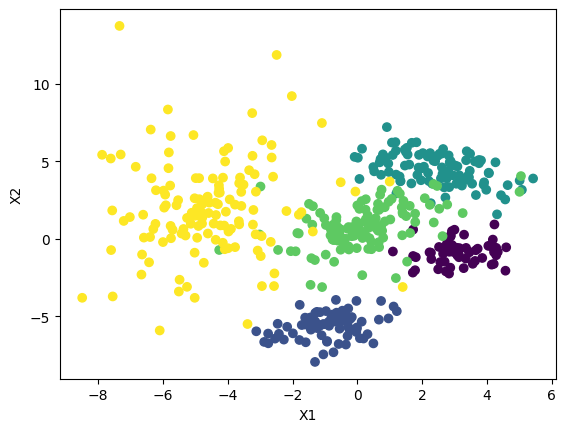

In [80]:
X, y_true, archetype = rpl.generate("five clusters with very different shapes", openai_api_key=OPENAI_KEY)

rpl.plot(X, y_true)